In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# cust(Y)
# tax(Y)
# sales(Y)
# discount coupons(Y)
# marketing spend






In [3]:
cust = pd.read_excel('CustomersData.xlsx')
cust.columns = cust.columns.str.lower()

sales = pd.read_csv('Online_Sales.csv')
sales.columns = sales.columns.str.lower()

cust_sales = pd.merge(left=sales, right=cust,on='customerid')

tax = pd.read_excel('Tax_amount.xlsx')
tax.columns = tax.columns.str.lower()
cust_sales_tax = pd.merge(left=cust_sales, right=tax,on='product_category')
cust_sales_tax.transaction_date = pd.to_datetime(cust_sales_tax.transaction_date, format='%Y%m%d')
cust_sales_tax['transaction_month'] = cust_sales_tax.transaction_date.dt.month
cust_sales_tax

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,gst,transaction_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,0.10,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,0.10,1
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,M,Chicago,12,0.10,1
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,M,Chicago,12,0.10,1
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,M,Chicago,12,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14159,27255,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,5,17.59,18.12,Clicked,F,California,13,0.18,5
52920,14577,27280,2019-05-04,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,6.00,Not Used,M,California,36,0.18,5
52921,17890,28366,2019-05-19,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,21.99,6.00,Used,F,Chicago,27,0.18,5
52922,16442,28662,2019-05-22,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,51.99,Used,F,New York,46,0.18,5


In [4]:
coupon = pd.read_csv('Discount_Coupon.csv')
coupon['date'] = pd.DataFrame(pd.to_datetime(coupon.Month, format='%b'))
coupon.date = coupon.date + pd.tseries.offsets.DateOffset(years=119)
coupon.Month = coupon.date.dt.month
coupon.Discount_pct = coupon.Discount_pct*0.01
coupon.columns = coupon.columns.str.strip().str.lower()
coupon

,month,product_category,coupon_code,discount_pct,date
0,1,Apparel,SALE10,0.1,2019-01-01
1,2,Apparel,SALE20,0.2,2019-02-01
2,3,Apparel,SALE30,0.3,2019-03-01
3,1,Nest-USA,ELEC10,0.1,2019-01-01
4,2,Nest-USA,ELEC20,0.2,2019-02-01
...,...,...,...,...,...
199,11,Notebooks & Journals,NJ20,0.2,2019-11-01
200,12,Notebooks & Journals,NJ30,0.3,2019-12-01
201,10,Android,AND10,0.1,2019-10-01
202,11,Android,AND20,0.2,2019-11-01


In [5]:
cust_sales_tax_coupon = pd.merge(left=cust_sales_tax, right=coupon, left_on=['product_category','transaction_month'],right_on=['product_category','month'])

cust_sales_tax_coupon

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,gst,transaction_month,month,coupon_code,discount_pct,date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,15719,33945,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,2,25.00,0.0,Not Used,F,Chicago,16,0.05,7,7,GC10,0.1,2019-07-01
52520,17634,33970,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Clicked,F,Chicago,32,0.05,7,7,GC10,0.1,2019-07-01
52521,17634,33971,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Clicked,F,Chicago,32,0.05,7,7,GC10,0.1,2019-07-01
52522,17634,33973,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Clicked,F,Chicago,32,0.05,7,7,GC10,0.1,2019-07-01


In [6]:
marketing = pd.read_csv('Marketing_Spend.csv')
marketing.Date = pd.to_datetime(marketing.Date)
marketing

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [78]:
df = pd.merge(left=cust_sales_tax_coupon, right=marketing, left_on=['transaction_date'],right_on=['Date'])
df

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,gst,transaction_month,month,coupon_code,discount_pct,date,Date,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,16222,41653,2019-10-25,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,99.00,6.0,Clicked,F,New York,45,0.05,10,10,NE10,0.1,2019-10-01,2019-10-25,3500,1416.14
52520,16222,41675,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Not Used,F,New York,45,0.05,10,10,NE10,0.1,2019-10-01,2019-10-25,3500,1416.14
52521,16222,41681,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Used,F,New York,45,0.05,10,10,NE10,0.1,2019-10-01,2019-10-25,3500,1416.14
52522,16222,41714,2019-10-25,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,99.00,6.0,Not Used,F,New York,45,0.05,10,10,NE10,0.1,2019-10-01,2019-10-25,3500,1416.14


#### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
- Invoice Value = [( Quantity\*Avg_price)\*(1-Dicount_pct)*\(1+GST)] + Delivery_Charges

In [79]:
df['invoice_value'] = (( df.quantity*df.avg_price)*(1-df.discount_pct)*(1+df.gst)) + df.delivery_charges
df['invoice_value']

0        158.6729
1        158.6729
2        249.5846
3         87.1850
4        158.6729
           ...   
52519     99.5550
52520    194.0550
52521    194.0550
52522     99.5550
52523    194.0550
Name: invoice_value, Length: 52524, dtype: float64

### 2. Perform Detailed exploratory analysis
- Understanding how many customers acquired every month
- Understand the retention of customers on month on month basis
- How the revenues from existing/new customers on month on month basis
- How the discounts playing role in the revenues?
- Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…
- Understand the trends/seasonality of sales by category, location, month etc…
- How number order varies and sales with different days?
- Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.
- How marketing spend is impacting on revenue?
- Which product was appeared in the transactions?
- Which product was purchased mostly based on the quantity?

#### Understanding how many customers acquired every month

In [9]:
#filtering customers having ternure less than 12 months and sorting by custromerId and transaction date
new_cust = df[df.tenure_months < 12].sort_values(by=['customerid','transaction_date'])

#first purchase of every customer having tenure less than 12 months 
new_cust = new_cust.groupby('customerid').first()

#keeping only the transaction date and extracting the month of 1st transaction from that date
new_cust = new_cust.transaction_date.dt.month

#resetting index to get custoemr id back as a column in the df
new_cust = new_cust.reset_index()

# grouping the custoemr by their order month and counting the no of customers for each month
new_cust = new_cust.groupby(by='transaction_date',as_index=False).count()
new_cust.columns = ['transaction_month', 'no of customers in that month']
new_cust

,transaction_month,no of customers in that month
0,1,38
1,2,16
2,3,36
3,4,32
4,5,18
5,6,33
6,7,22
7,8,31
8,9,11
9,10,28


#### Understand the retention of customers on month on month basis

In [10]:
repeat_customer = df[['customerid','transaction_date']]
repeat_cust_list = repeat_customer.groupby(by='customerid',as_index=False).count()
#filtering customers having more than 1 transaction
repeat_cust_list = repeat_cust_list[repeat_cust_list.transaction_date >= 2]
repeat_cust_list = repeat_cust_list.customerid.to_list()
repeat_customers = df[df['customerid'].isin(repeat_cust_list)]
repeat_customers.head(3)

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,gst,transaction_month,month,coupon_code,discount_pct,date,Date,Offline_Spend,Online_Spend,invoice_value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.5,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,0.1,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.5,158.6729
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,M,Chicago,12,0.1,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.5,249.5846


In [11]:
repeat_customers = repeat_customers[['transaction_date','customerid']]
repeat_customers.transaction_date = repeat_customers.transaction_date.dt.month
repeat_customers.columns=['transaction_month','customerid']

<AxesSubplot:xlabel='transaction_month'>

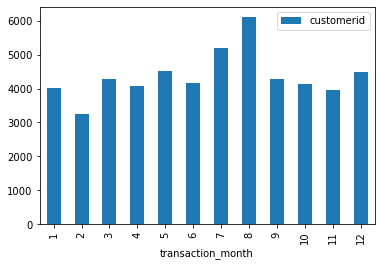

In [12]:
#plot of no of orders by repeat customers every month
repeat_customers.groupby(by='transaction_month').count().plot(kind='bar')

#### How the revenues from existing/new customers on month on month basis

D:\software\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='transaction_date'>

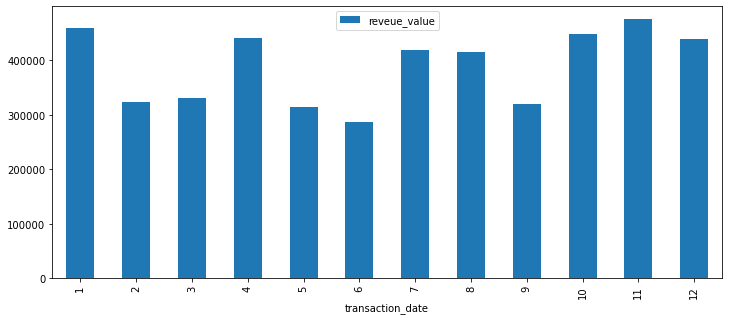

In [13]:
revenue = df[['invoice_value','transaction_date']]
revenue.transaction_date = revenue.transaction_date.dt.month
revenue = revenue.groupby(by='transaction_date').sum()
revenue.columns=['reveue_value']
revenue.plot(kind='bar',figsize=(12,5))

#### How the discounts playing role in the revenues?

<AxesSubplot:xlabel='discount_pct'>

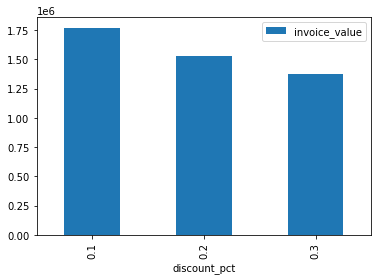

In [14]:
discount_rev = df[['discount_pct','invoice_value']]
discount_rev = discount_rev.groupby(by='discount_pct').sum()
discount_rev.plot(kind='bar')

#### Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc

#### KPI of revenue

<AxesSubplot:xlabel='month'>

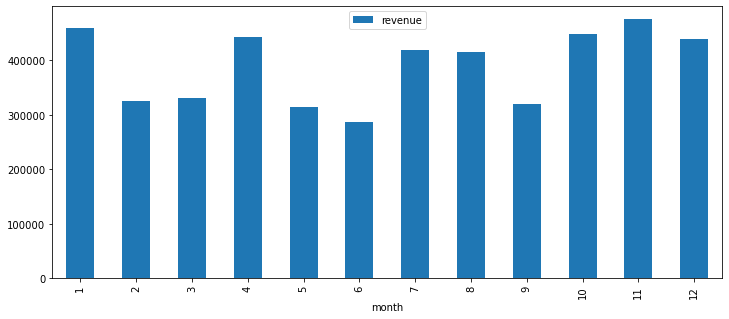

In [15]:
kpi_month_rev = df[['invoice_value','transaction_date']]
kpi_month_rev.transaction_date = kpi_month_rev.transaction_date.dt.month
kpi_month_rev.columns = ['revenue','month']
kpi_month_rev.groupby(by='month').sum().plot(kind='bar',figsize=(12,5))

<ipython-input-16-f4727ee62b78>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  kpi_week.transaction_date = kpi_week.transaction_date.dt.week


<AxesSubplot:xlabel='week'>

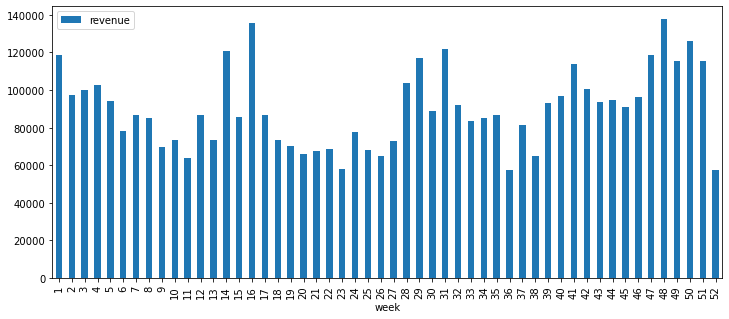

In [16]:
kpi_week = df[['invoice_value','transaction_date']]
kpi_week.transaction_date = kpi_week.transaction_date.dt.week
kpi_week.columns = ['revenue','week']
kpi_week.groupby(by='week').sum().plot(kind='bar',figsize=(12,5))

<AxesSubplot:xlabel='day'>

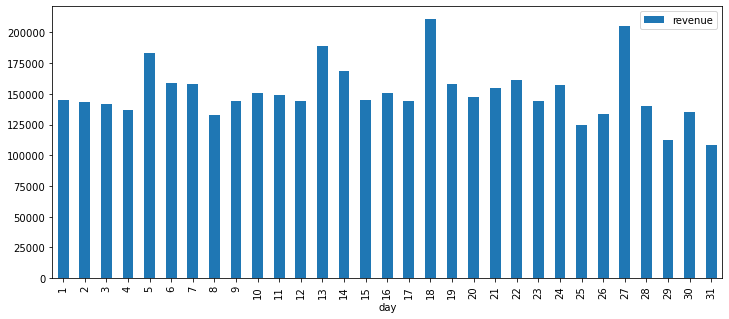

In [17]:
kpi_day = df[['invoice_value','transaction_date']]
kpi_day.transaction_date = kpi_day.transaction_date.dt.day
kpi_day.columns = ['revenue','day']
kpi_day.groupby(by='day').sum().plot(kind='bar',figsize=(12,5))

<AxesSubplot:xlabel='product_category'>

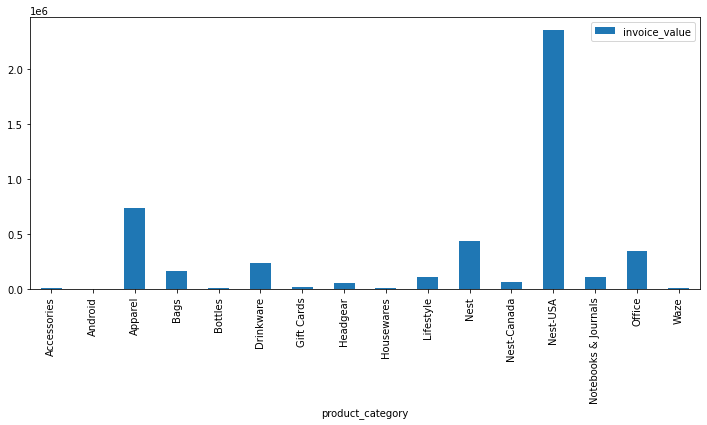

In [18]:
category_rev = df[['product_category','invoice_value']]
category_rev = category_rev.groupby(by='product_category').sum()
category_rev.plot(kind='bar',figsize=(12,5))

#### KPI of no of orders

<AxesSubplot:xlabel='month'>

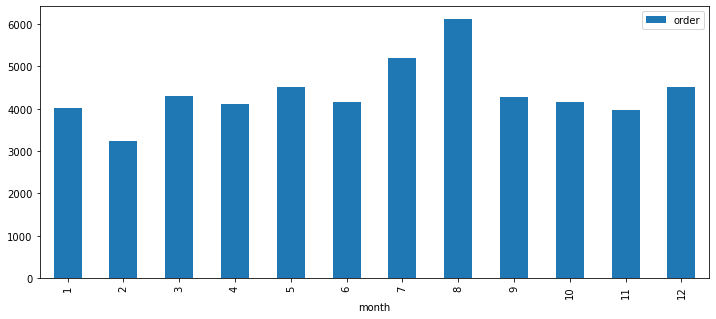

In [19]:
#KPI of no of orders per month
kpi_month_orders = df[['transaction_id','transaction_date']]
kpi_month_orders.transaction_date = kpi_month_orders.transaction_date.dt.month
kpi_month_orders.columns = ['order','month']
kpi_month_orders.groupby(by='month').count().plot(kind='bar',figsize=(12,5))

<ipython-input-20-4fd0a9a5aa11>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  kpi_week_orders.transaction_date = kpi_week_orders.transaction_date.dt.week


<AxesSubplot:xlabel='week'>

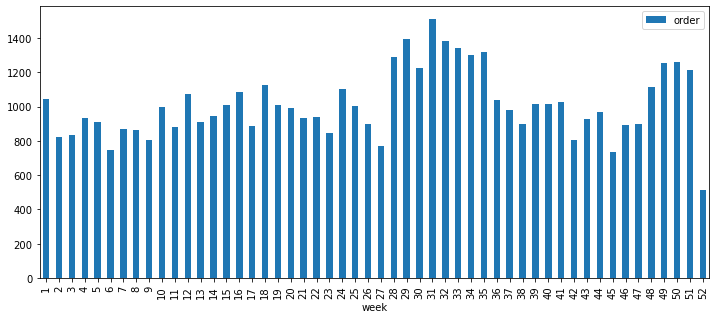

In [20]:
#KPI of no of orders per week
kpi_week_orders = df[['transaction_id','transaction_date']]
kpi_week_orders.transaction_date = kpi_week_orders.transaction_date.dt.week
kpi_week_orders.columns = ['order','week']
kpi_week_orders.groupby(by='week').count().plot(kind='bar',figsize=(12,5))

<AxesSubplot:xlabel='day'>

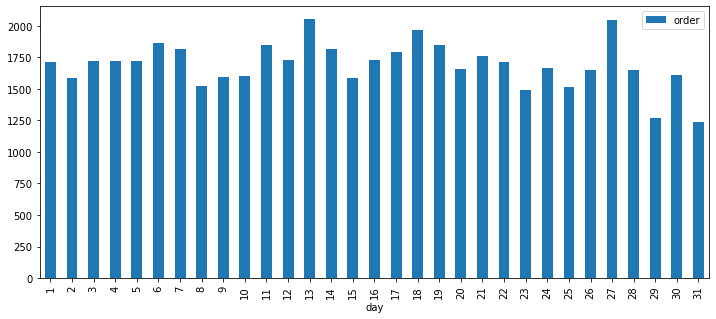

In [21]:
#KPI of no of orders per day
kpi_day_orders = df[['transaction_id','transaction_date']]
kpi_day_orders.transaction_date = kpi_day_orders.transaction_date.dt.day
kpi_day_orders.columns = ['order','day']
kpi_day_orders.groupby(by='day').count().plot(kind='bar',figsize=(12,5))

<AxesSubplot:xlabel='product_category'>

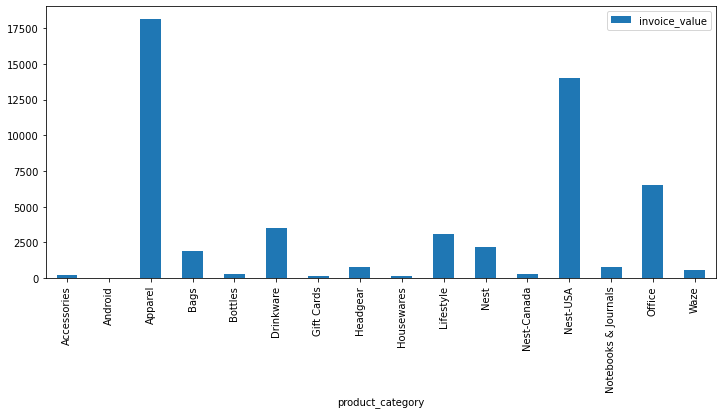

In [22]:
category_order_count = df[['product_category','invoice_value']]
category_order_count = category_order_count.groupby(by='product_category').count()
category_order_count.plot(kind='bar',figsize=(12,5))

#### Understand the trends/seasonality of sales by category, location, month etc

<AxesSubplot:title={'center':'revenue by category'}, xlabel='product_category'>

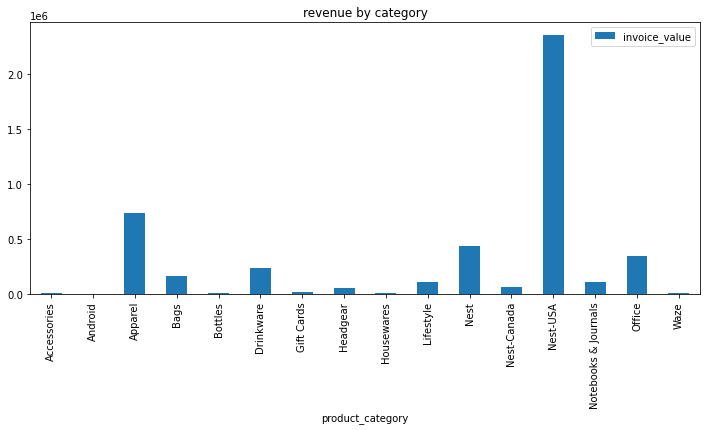

In [23]:
#trend by category
category_trend = df[['product_category','invoice_value']]
category_trend = category_trend.groupby(by='product_category').sum()
category_trend.plot(kind='bar',figsize=(12,5),title='revenue by category')

<AxesSubplot:xlabel='location'>

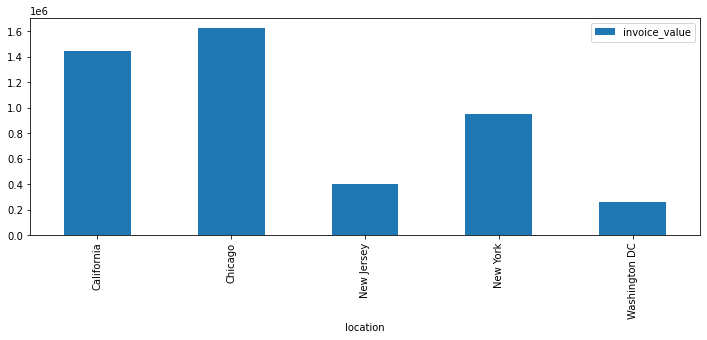

In [24]:
#revenue by location
df[['location','invoice_value']].groupby(by='location').sum().plot(kind='bar',figsize=(12,4))

<AxesSubplot:xlabel='month'>

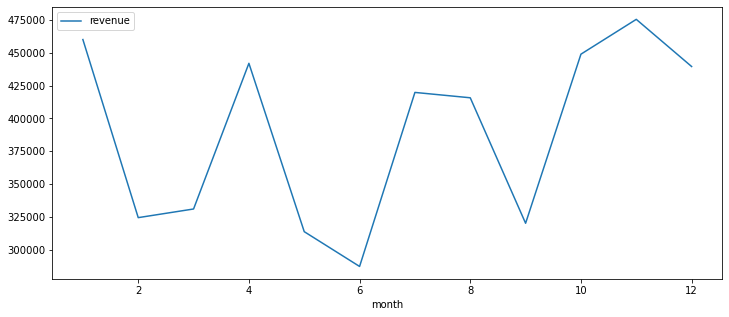

In [25]:
#revenue trend by month
kpi_month_rev = df[['invoice_value','transaction_date']]
kpi_month_rev.transaction_date = kpi_month_rev.transaction_date.dt.month
kpi_month_rev.columns = ['revenue','month']
kpi_month_rev.groupby(by='month').sum().plot(figsize=(12,5))

#### How number order varies and sales with different days?

#### Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [26]:
#marketing spend by month
df_market = marketing[['Date','Offline_Spend','Online_Spend']]

<AxesSubplot:xlabel='Date'>

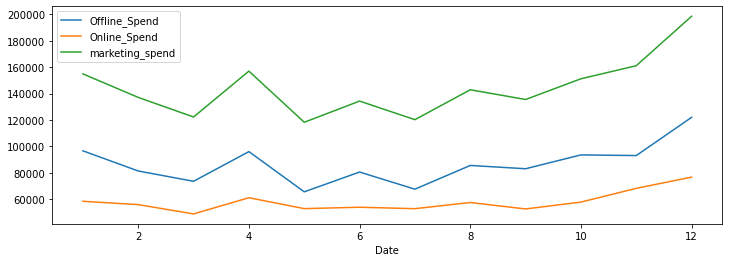

In [27]:
df_market.Date =  df_market.Date.dt.month
df_market = df_market.groupby(by='Date').sum()
df_market['marketing_spend'] = df_market.Offline_Spend + df_market.Online_Spend
df_market.plot(figsize=(12,4))

D:\software\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:title={'center':'markting spend as percentage of revenue'}, xlabel='month', ylabel='percent of revenue'>

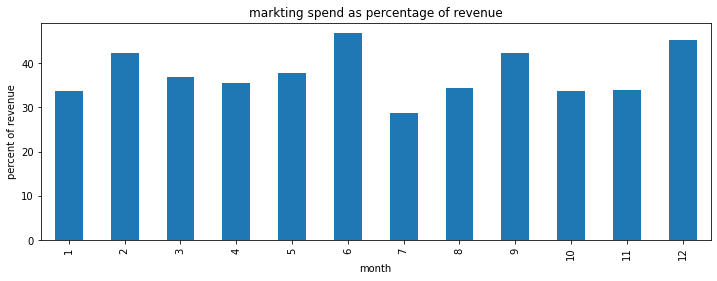

In [28]:
#percentage of marketing spend out of revenue
market_rev_pct = df[['Date','invoice_value']]

market_rev_pct.Date = market_rev_pct.Date.dt.month
market_rev_pct = market_rev_pct.groupby(by='Date').sum()
market_rev_pct = market_rev_pct.join(df_market)
((market_rev_pct.marketing_spend/market_rev_pct.invoice_value)*100).plot(kind='bar',
                                                                         figsize=(12,4),
                                                                         title='markting spend as percentage of revenue',
                                                                        ylabel='percent of revenue',
                                                                        xlabel='month')

<AxesSubplot:title={'center':'tax as percent of revenue'}, xlabel='month', ylabel='percent of revenue'>

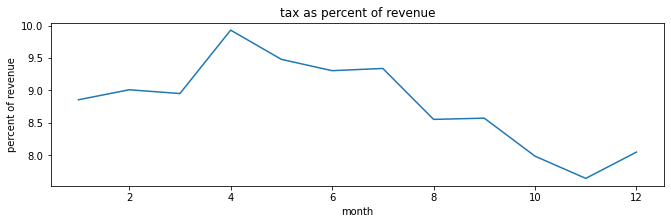

In [29]:
# Tax by month
tax = (( df.quantity*df.avg_price)*(1-df.discount_pct)*(df.gst))
tax = pd.DataFrame(tax)
tax = tax.join(df.transaction_date)
tax.columns = ['tax','month']
tax['month'] = tax.month.dt.month
tax = tax.groupby(by='month').sum()
tax = tax.join(market_rev_pct)
tax = tax[['tax','invoice_value']]
tax.tax = (tax.tax/tax.invoice_value)*100
tax.tax.plot(figsize=(11,3), title='tax as percent of revenue',
            xlabel='month',
            ylabel='percent of revenue')

D:\software\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='transaction_date'>

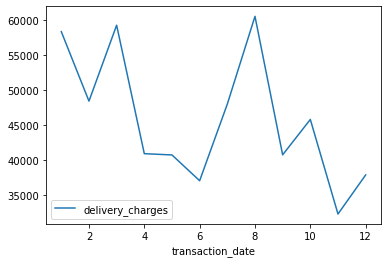

In [30]:
#delivery charge per month
delivery = df[['transaction_date','delivery_charges']]
delivery.transaction_date= delivery.transaction_date.dt.month
delivery = delivery.groupby(by='transaction_date').sum()
delivery.plot()

#### How marketing spend is impacting on revenue?

D:\software\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='Date'>

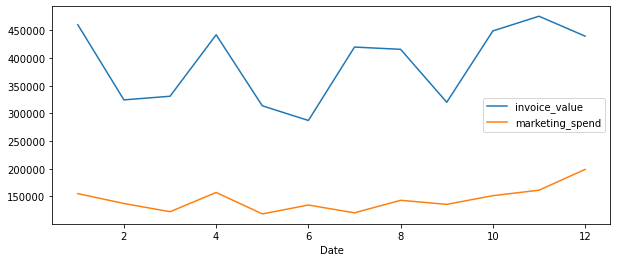

In [31]:
#percentage of marketing spend out of revenue
market_rev_pct = df[['Date','invoice_value']]

market_rev_pct.Date = market_rev_pct.Date.dt.month
market_rev_pct = market_rev_pct.groupby(by='Date').sum()
market_rev_pct = market_rev_pct.join(df_market)
market_rev_pct[['invoice_value','marketing_spend']].plot(figsize=(10,4))

In [32]:
# we will now find the correllation between the revenue and the marketing spend
marketing_corr = stats.pearsonr(market_rev_pct.invoice_value, market_rev_pct.marketing_spend)
marketing_corr[0]


#as the correlatoin between revenue and marketing spend per month is positive and high, 
# there is strong positive correlatin between revenue and marketing spend.

0.6277211041446451

#### Which product was appeared(most) in the transactions?

In [33]:
product_sales = df[['product_description']].value_counts()
product_sales = pd.DataFrame(product_sales)
product_sales = product_sales.reset_index()
product_sales.columns = ['product','count']
print(product_sales.loc[0,:])

product    Nest Learning Thermostat 3rd Gen-USA - Stainle...
count                                                   3511
Name: 0, dtype: object


#### Which product was purchased mostly based on the quantity?

In [34]:
product_sales = df[['product_description','quantity']]
product_sales = product_sales.groupby(by='product_description').sum().sort_values(by='quantity',ascending=False)
print(product_sales.head(1))

                     quantity
product_description          
Maze Pen                16234


### 3. Performing Customer Segmentation

#### Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,Standard customers and define strategy on the same.


In [35]:
#value based quantile segmentation
cust_seg = df[['customerid','invoice_value']].groupby(by='customerid').sum()
cust_seg['segment'] = pd.qcut(cust_seg.invoice_value,q=4,labels=['Standard','Silver','Gold','Premium'])
cust_seg


#strategy
# Premium : more cross selling options
# Gold    : product with more margin and more corss selling products
# Silver  : more discounts
# Standard: send them discount vouchers so that they come back to the site


,invoice_value,segment
customerid,,
12346,174.98174,Standard
12347,12059.17780,Premium
12348,1501.92620,Silver
12350,1183.71394,Silver
12356,1753.45086,Silver
...,...,...
18259,789.15360,Silver
18260,2573.65633,Gold
18269,155.66092,Standard


### RFM

In [36]:
rfm = df[['customerid','invoice_value','transaction_date']]

rfm_f = rfm.groupby(by=['customerid']).count()
rfm_f = rfm_f[['transaction_date']]
rfm_f.columns=['frequency']


In [37]:
#calculating RFM
rfm = df[['customerid','invoice_value','transaction_date']]



rfm_m = rfm.groupby(by='customerid').sum()
rfm_m = rfm_m[['invoice_value']]
rfm_m.columns = ['monetary']



rfm_f = rfm.groupby(by=['customerid']).count()
rfm_f = rfm_f[['transaction_date']]
rfm_f.columns=['frequency']


recency = df.transaction_date - df.transaction_date.max()
recency = pd.DataFrame(recency)
rfm_r = df[['customerid']]
rfm_r = rfm_r.join(recency)
rfm_r.transaction_date = rfm_r.transaction_date.dt.days
rfm_r = rfm_r.groupby(by='customerid').mean()
rfm_r.columns = ['recency']
rfm_r.recency  = rfm_r.recency*-1
rfm_r.recency = np.round(rfm_r.recency)

rfm_rf = pd.merge(rfm_r, rfm_f, left_index=True, right_index=True)
rfm = pd.merge(rfm_rf,rfm_m,left_index=True, right_index=True)


In [38]:
rfm['r'] = pd.qcut(rfm.recency,q = 4,labels = [1,2,3,4] )
rfm.r = rfm.r.astype('int64')
rfm['f'] = pd.qcut(rfm.frequency,q = 4,labels = [1,2,3,4] )
rfm.f = rfm.f.astype('int64')
rfm['m'] = pd.qcut(rfm.monetary,q = 4,labels = [1,2,3,4] )
rfm.m = rfm.m.astype('int64')
rfm['rfm_labels'] = rfm.r + rfm.f + rfm.m
rfm

,recency,frequency,monetary,r,f,m,rfm_labels
customerid,,,,,,,
12346,107.0,2,174.98174,1,1,1,3
12347,172.0,59,12059.17780,2,4,4,10
12348,161.0,23,1501.92620,2,3,2,7
12350,17.0,17,1183.71394,1,2,2,5
12356,107.0,36,1753.45086,1,3,2,6
...,...,...,...,...,...,...,...
18259,270.0,6,789.15360,4,1,2,7
18260,152.0,39,2573.65633,2,3,3,8
18269,260.0,8,155.66092,4,1,1,6


In [39]:
platinum = [11,12] 
gold = [8,9,10]
silver = [5,6,7]
standard = [3,4,5]

def rfm_categorizer(df):
    if df.rfm_labels >=11:
        return 'platinum'
    elif df.rfm_labels >8:
        return 'gold'
    elif df.rfm_labels >=5:
        return 'silver'
    elif df.rfm_labels >=3:
        return 'standard'
            
            
rfm['category'] = rfm.apply(rfm_categorizer, axis=1)
rfm

,recency,frequency,monetary,r,f,m,rfm_labels,category
customerid,,,,,,,,
12346,107.0,2,174.98174,1,1,1,3,standard
12347,172.0,59,12059.17780,2,4,4,10,gold
12348,161.0,23,1501.92620,2,3,2,7,silver
12350,17.0,17,1183.71394,1,2,2,5,silver
12356,107.0,36,1753.45086,1,3,2,6,silver
...,...,...,...,...,...,...,...,...
18259,270.0,6,789.15360,4,1,2,7,silver
18260,152.0,39,2573.65633,2,3,3,8,silver
18269,260.0,8,155.66092,4,1,1,6,silver


In [40]:
rfm.groupby(by='category').agg({
                                'recency':'mean',
                                'frequency':'mean',
                                'monetary':['mean','count']})

recency  frequency     monetary      
                mean       mean         mean count
category                                          
gold      186.849432  62.667614  5569.227881   352
platinum  250.830508  93.327684  8838.167134   177
silver    176.814815  17.088624  1423.698293   756
standard   86.382514   5.612022   418.155805   183

#### Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
cat = df.select_dtypes(include='object')
for x in ['product_sku', 'product_description', 'product_category','coupon_status', 'gender', 'location', 'coupon_code']:
    cat[x] = labelencoder.fit_transform(cat[x])

df = df.select_dtypes(exclude='object').join(cat)

NameError: name 'labelencoder' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale_data = df.select_dtypes(exclude='datetime64')
scaler = StandardScaler()
scale_data = scaler.fit_transform(scale_data)
scale_data = pd.DataFrame(scale_data,columns=df.select_dtypes(exclude='datetime64').columns)
scale_data = scale_data.drop(labels='customerid',axis=1)

In [ ]:
#using elbow method to find optimum cluster values
cluster_range = range(2,20)


cluster_errors = []
for x in cluster_range:
  kmeans_model = KMeans(n_clusters=x, random_state=1).fit(scale_data)
  cluster_errors.append(kmeans_model.inertia_)


cluster_df = pd.DataFrame({'num_clusters' : cluster_range,'cluster_errors' : cluster_errors})
cluster_df

In [ ]:
cluster_df.plot()
#as we can see from the graph that the curve slows down around n_clustes = 8

In [ ]:
#building models with 8 clusters
from sklearn.cluster import KMeans


kmeans_model = KMeans(n_clusters=8, random_state=1).fit(scale_data)
labels = kmeans_model.labels_
df['labels'] = labels
# metrics.silhouette_score(X, labels, metric='euclidean')

In [ ]:
df

In [ ]:
df.groupby(by='labels').agg({'customerid':'count',
                             'quantity':['sum','mean'],
                             'avg_price':'mean',
                             'delivery_charges':'mean',
                             'invoice_value':['sum','mean'],
                             })

</br>

</br>

### 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [ ]:
# • First define dependent variable with categories low value, medium value, high value using customer revenue.
# • Then perform Classification model

In [ ]:
cust_lifetime_value = df[['customerid','invoice_value']].groupby(by='customerid',as_index= False).sum()

# 1 = low value
# 2 = med value
# 3 = high value
cust_lifetime_value['class'] = pd.qcut(cust_lifetime_value.invoice_value,q = 3,labels = [1,2,3])

cust_lifetime_value.columns=['customerid', 'lifetime_value', 'class']
df = pd.merge(left=df, right=cust_lifetime_value,on='customerid') 

In [ ]:
df_classification = df.select_dtypes(exclude='datetime64')
df_classification.drop(labels=['customerid','transaction_id','month','class'],inplace=True,axis=1)


target = df['class']

In [ ]:
#DO NOT run this cell if you have a light pc, it takes 10 min to run this cell. the columns selected by this cell
# are already saved in the next cell.
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

dt_reg = DecisionTreeClassifier(random_state=0)

rfc_1 = RandomForestClassifier(n_estimators=25)


rfe = RFE(estimator=rfc_1, n_features_to_select=10)
rfe.fit(df_classification, target)

rfe.ranking_


# selecting features given by RFE
f = rfe.get_support(1) #the most important features
selected_x = df_classification[df_classification.columns[f]] # final features`
selected_x.columns

In [ ]:
splitting into tran x train y, test x test y

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(selected_x, target, test_size=0.25, random_state=11)

In [ ]:
Training classification models

In [ ]:
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
K_neighbours_classifier = KNeighborsClassifier(n_jobs=-1)
K_neighbours_classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_classifier = LogisticRegression(n_jobs=-1, random_state=11)
LGR_classifier.fit(X_train, Y_train);

            
# Train Decision Tree Model
Dt_classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=11)
Dt_classifier.fit(X_train, Y_train)



In [ ]:
classification_models = {'KNN_classifier': K_neighbours_classifier,
                         'Logistic_regresssion_classifier': LGR_classifier,
                         'Decision_tree_classifier': Dt_classifier                         
                         }

In [ ]:
from sklearn import metrics


for k,v in classification_models.items():
  accuracy = metrics.accuracy_score(Y_train,v.predict(X_train))
  confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
  classification = metrics.classification_report(Y_train, v.predict(X_train))
  print('--------------------------------{} Model Evaluation--------------------------'.format(k))
  print('Accuracy :' '\n',accuracy) 
  print('\n') 
  print('Confusion matrix:'' \n', confusion_matrix)
  print('\n')
  print('Classification report:' '\n', classification)

In [ ]:
### validating models with test set

In [ ]:
for k,v in classification_models.items():
  accuracy = metrics.accuracy_score(Y_test,v.predict(X_test))
  confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
  classification = metrics.classification_report(Y_test, v.predict(X_test))
  print('--------------------------------{} Model Validation--------------------------'.format(k))
  print('Accuracy :' '\n',accuracy) 
  print('\n') 
  print('Confusion matrix:'' \n', confusion_matrix)
  print('\n')
  print('Classification report:' '\n', classification)



### 5. Cross-Selling (Which products are selling together)
You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

### 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)
For this, we need create dependent variable at customer level (average days per one
transaction for only repeat customers and divide into groups 0-30 days, 30-60 days,
60-90 days and 90+ days) then build classification model to predict next purchase of
given customer.

In [ ]:
repeat_customer = df[['customerid','transaction_date']]
repeat_cust_list = repeat_customer.groupby(by='customerid',as_index=False).count()
#filtering customers having more than 1 transaction
repeat_cust_list = repeat_cust_list[repeat_cust_list.transaction_date >= 2]
repeat_cust_list = repeat_cust_list.customerid.to_list()
repeat_customers = df[df['customerid'].isin(repeat_cust_list)]

In [ ]:
repeat_cust = pd.merge(left=repeat_customers, right=rfm_r, on='customerid')

In [ ]:
# 0-30 = 4
# 30-60 = 3
# 60-90 = 2
# 90+ = 1


def repeat_cust_labeler(df):
    if df.recency >90:
        return 1
    elif df.recency >=60:
        return 2
    elif df.recency >=30:
        return 3
    elif df.recency >0:
        return 4
            
            
repeat_cust['purchase_label'] = repeat_cust.apply(repeat_cust_labeler, axis=1)
repeat_cust

In [ ]:
repeat_cust = repeat_cust.dropna()
pred_next_purchase = repeat_cust[['Date', 'Offline_Spend', 'Online_Spend', 'avg_price', 'class',
                                   'coupon_code', 'coupon_status', 'customerid', 'date', 'delivery_charges',
                                   'discount_pct', 'gender', 'gst', 'invoice_value', 'labels', 'lifetime_value',
                                   'location', 'month', 'product_category', 'product_description', 'product_sku',
                                   'quantity', 'recency', 'tenure_months', 'transaction_date', 'transaction_id',
                                   'transaction_month']]

pred_next_purchase  = pred_next_purchase.drop(labels=['customerid','transaction_date','Date','transaction_id','date'],axis=1)


target = repeat_cust.purchase_label

In [ ]:
dt_reg = DecisionTreeClassifier(random_state=0)

rfc_1 = RandomForestClassifier(n_estimators=10)


rfe = RFE(estimator=rfc_1, n_features_to_select=5)
rfe.fit(pred_next_purchase, target)

rfe.ranking_


# selecting features given by RFE
f = rfe.get_support(1) #the most important features
selected_x = pred_next_purchase[pred_next_purchase.columns[f]] # final features`
selected_x.columns

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(selected_x, target, test_size=0.25, random_state=11)

In [ ]:
# Train KNeighborsClassifier Model
K_neighbours_classifier = KNeighborsClassifier(n_jobs=-1)
K_neighbours_classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_classifier = LogisticRegression(n_jobs=-1, random_state=11)
LGR_classifier.fit(X_train, Y_train);

            
# Train Decision Tree Model
Dt_classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=11)
Dt_classifier.fit(X_train, Y_train)

In [ ]:
classification_models = {'KNN_classifier': K_neighbours_classifier,
                         'Logistic_regresssion_classifier': LGR_classifier,
                         'Decision_tree_classifier': Dt_classifier                         
                         }

In [ ]:
# checking error metrics with train test
for k,v in classification_models.items():
  accuracy = metrics.accuracy_score(Y_train,v.predict(X_train))
  confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
  classification = metrics.classification_report(Y_train, v.predict(X_train))
  print('--------------------------------{} Model Evaluation--------------------------'.format(k))
  print('Accuracy :' '\n',accuracy) 
  print('\n') 
  print('Confusion matrix:'' \n', confusion_matrix)
  print('\n')
  print('Classification report:' '\n', classification)

In [ ]:
#validating models with test set
for k,v in classification_models.items():
  accuracy = metrics.accuracy_score(Y_test,v.predict(X_test))
  confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
  classification = metrics.classification_report(Y_test, v.predict(X_test))
  print('--------------------------------{} Model Validation--------------------------'.format(k))
  print('Accuracy :' '\n',accuracy) 
  print('\n') 
  print('Confusion matrix:'' \n', confusion_matrix)
  print('\n')
  print('Classification report:' '\n', classification)

### 7. Perform cohort analysis by defining below cohorts
- Customers who started in each month and understand their behaviour
- Which Month cohort has maximum retention?

In [80]:
cohort_date  = df.groupby(by='customerid')['transaction_date'].min()
df = pd.merge(left=df, right=cohort_date, on='customerid')

In [82]:
df=df.rename(columns = {'transaction_date_y':'cohort_month'})

In [85]:
df.cohort_month = df.cohort_month.dt.month

In [86]:
df

,customerid,transaction_id,transaction_date_x,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,gst,transaction_month,month,coupon_code,discount_pct,date,Date,Offline_Spend,Online_Spend,invoice_value,cohort_month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50,158.6729,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50,158.6729,1
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50,249.5846,1
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50,87.1850,1
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,M,Chicago,12,0.10,1,1,ELEC10,0.1,2019-01-01,2019-01-01,4500,2424.50,158.6729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,16085,39982,2019-10-06,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,349.00,6.00,Clicked,M,California,15,0.05,10,10,NE10,0.1,2019-10-01,2019-10-06,3000,2230.76,335.8050,10
52520,16085,39985,2019-10-06,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,99.00,6.00,Clicked,M,California,15,0.05,10,10,NE10,0.1,2019-10-01,2019-10-06,3000,2230.76,99.5550,10
52521,16085,39986,2019-10-06,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,99.00,6.00,Clicked,M,California,15,0.05,10,10,NE10,0.1,2019-10-01,2019-10-06,3000,2230.76,99.5550,10
52522,16085,39991,2019-10-06,GGOENEBQ086499,Nest Cam IQ - USA,Nest,2,199.00,6.00,Used,M,California,15,0.05,10,10,NE10,0.1,2019-10-01,2019-10-06,3000,2230.76,382.1100,10


In [92]:
df['cohort_index'] = (df.transaction_month+1) - df.cohort_month

In [100]:
cohort_data = df.groupby(['cohort_month', 'cohort_index'])['customerid'].apply(pd.Series.nunique).reset_index()

In [102]:
cohort_data

,cohort_month,cohort_index,customerid
0,1,1,215
1,1,2,13
2,1,3,24
3,1,4,34
4,1,5,23
...,...,...,...
73,10,2,6
74,10,3,4
75,11,1,68
76,11,2,7


In [103]:
cohort_count = cohort_data.pivot_table(index = 'cohort_month',
                                       columns = 'cohort_index',
                                       values = 'customerid')


cohort_count

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
1,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
3,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
4,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
5,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
6,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
7,93.0,12.0,4.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
8,136.0,14.0,16.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
1,100.0,6.0,11.2,15.8,10.7,20.5,16.3,21.9,10.7,13.0,9.3,15.8
2,100.0,7.3,9.4,16.7,17.7,22.9,19.8,15.6,12.5,11.5,16.7,NaN
3,100.0,10.2,19.8,14.1,18.1,18.6,12.4,12.4,8.5,10.7,NaN,NaN
4,100.0,8.6,14.7,14.7,11.0,9.2,6.1,9.8,7.4,NaN,NaN,NaN
5,100.0,10.7,8.0,11.6,8.9,11.6,12.5,7.1,NaN,NaN,NaN,NaN
6,100.0,14.6,16.1,8.8,8.0,10.2,8.0,NaN,NaN,NaN,NaN,NaN
7,100.0,12.9,4.3,5.4,10.8,8.6,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,10.3,11.8,8.1,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,7.7,3.8,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


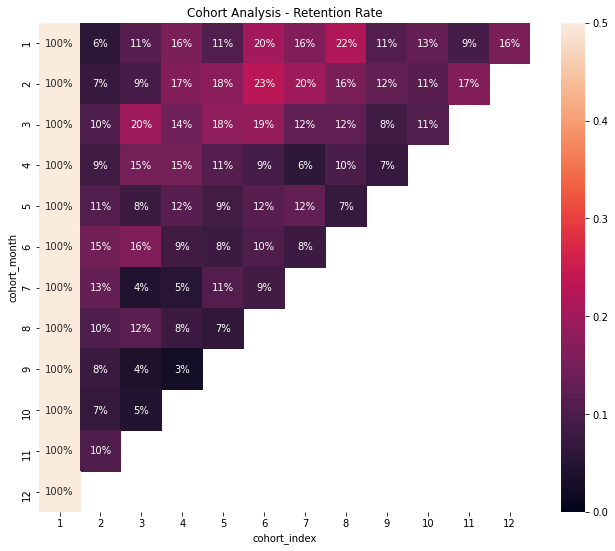

In [114]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5)
plt.show()